<a href="https://colab.research.google.com/github/AdhamEbaidd/Exploring-Hotel-Booking-Trends-and-Predicting-Cancellations/blob/main/HotelBookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries and dataset

In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.animation as animation

In [2]:
df = pd.read_csv("egphotelbookings.csv")
df.describe()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,59694.500000,0.370416,104.011416,2018.134182,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,...,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,34465.068657,0.482918,106.863097,0.893177,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,...,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29847.250000,0.000000,18.000000,2017.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.500000,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,89541.750000,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [3]:
df.columns

Index(['Unnamed: 0', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

#removing null values

In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0


Since the company column is mostly empty we will remove it altogether.

In [5]:
df.drop("company", axis=1, inplace=True)

null in the 'agent' column most likely means no agent fees so we will replace it with 0

In [6]:
df["agent"].fillna(0, inplace=True)

next we will drop null values from both 'country' and the 'children' columns

In [7]:
df.dropna(subset=["country", "children"], inplace=True)

In [8]:
df['babies'].value_counts()

,count
babies,
0,117984
1,898
2,14
10,1
9,1


we will not use the babies column as the number of guests with babies were minimal and we will not use the 'arrival_date_wee_number' column either. Furthermore the 'Unnamed:0 column is just the index so it is not needed.

In [9]:
df.drop(['babies', 'Unnamed: 0' , 'arrival_date_week_number'], axis=1, inplace=True)

Now let's make sure there are no more null values in the remaining columns

In [10]:
if(df.isnull().values.any()==False):
  print("no more null values")

no more null values


#removing outliers

Now we need to check for and remove outliers

Some columns could have unrealistically high values due to an error during data entry so we must check for it just in case

In [11]:
cl = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children','previous_cancellations', 'previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr',
       'required_car_parking_spaces', 'total_of_special_requests']
for col in cl:
  print(col)
  print(df[col].max())

stays_in_weekend_nights
16
stays_in_week_nights
41
adults
55
children
10.0
previous_cancellations
26
previous_bookings_not_canceled
72
booking_changes
21
days_in_waiting_list
391
adr
5400.0
required_car_parking_spaces
8
total_of_special_requests
5


we check the boxplots for the 'agent' and 'lead_time' columns

<Axes: >

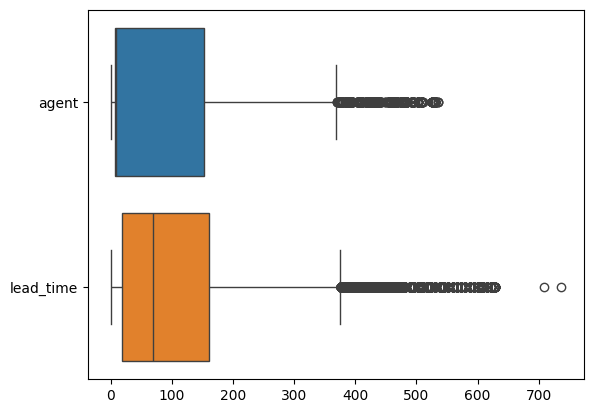

In [12]:
sns.boxplot(data=df[['agent' ,'lead_time']] , orient='h')

Now we romve the outliers from the lead_time and adr columns

In [13]:
# function that removes outliers from a column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [14]:
df = remove_outliers(df, 'lead_time')
df = remove_outliers(df, 'agent')

Let's check again

<Axes: >

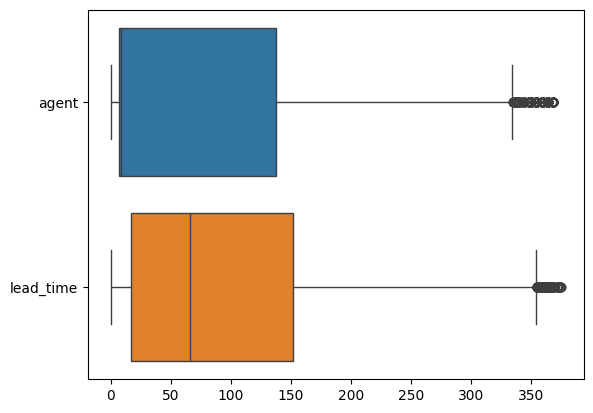

In [15]:
sns.boxplot(data=df[['agent' ,'lead_time']] , orient='h')

We add a 'revenue' column that is equal to the total revenue mad from each reservation

In [16]:
df['revenue'] = df['adr'] * (df['stays_in_weekend_nights'] + df['stays_in_week_nights'])

#SQL

We will load the dtaframe into an SQL database for some querying

In [17]:
%load_ext sql

In [18]:
conn = sqlite3.connect("egphotelbookings.db")
cursor = conn.cursor()

In [19]:
%sql sqlite:///egphotelbookings.db

In [20]:
df.to_sql("hotelbookings", conn, if_exists="replace", index=False)

114667

let's check which months have the highest amount of bookings

In [21]:
%sql select arrival_date_month , count(arrival_date_month) from hotelbookings group by arrival_date_month order by count(arrival_date_month) desc;

 * sqlite:///egphotelbookings.db
Done.


arrival_date_month,count(arrival_date_month)
August,13395
July,11988
May,11276
April,10713
June,10599
October,10509
September,10077
March,9341
February,7901
November,6576


Which months bring in the most revenue?

In [22]:
%sql select arrival_date_month as Month , round(sum(revenue),0) as total_revenue from hotelbookings group by arrival_date_month order by total_revenue desc;

 * sqlite:///egphotelbookings.db
Done.


Month,total_revenue
August,7765516.0
July,6372167.0
June,4387268.0
May,3970461.0
September,3621936.0
April,3578490.0
October,2896509.0
March,2500225.0
February,1792659.0
December,1743961.0


What are the customer types?

In [23]:
%sql select distinct customer_type from hotelbookings;

 * sqlite:///egphotelbookings.db
Done.


customer_type
Transient
Contract
Transient-Party
Group


In [24]:
%sql select customer_type , count(customer_type) from hotelbookings group by customer_type order by count(customer_type) DESC;

 * sqlite:///egphotelbookings.db
Done.


customer_type,count(customer_type)
Transient,86769
Transient-Party,23352
Contract,3990
Group,556


what is the average number of nights stayed in each hotel?

In [25]:
%sql select hotel , round(avg(stays_in_weekend_nights + stays_in_week_nights), 2) from hotelbookings group by hotel;

 * sqlite:///egphotelbookings.db
Done.


hotel,"round(avg(stays_in_weekend_nights + stays_in_week_nights), 2)"
JW Marriott Hotel,3.0
Renaissance Hotel,4.29


What is the number of reservations per distribution channel?

In [26]:
%sql select distribution_channel , count(distribution_channel) from hotelbookings group by distribution_channel order by count(distribution_channel) desc;

 * sqlite:///egphotelbookings.db
Done.


distribution_channel,count(distribution_channel)
TA/TO,93782
Direct,14425
Corporate,6266
GDS,193
Undefined,1


what nationality of guests make the most reservations?

In [27]:
%sql select country , count(country) as number_of_reservations from hotelbookings group by country order by number_of_reservations desc limit 10;

 * sqlite:///egphotelbookings.db
Done.


country,number_of_reservations
PRT,46019
GBR,11665
FRA,10256
ESP,8512
DEU,6807
ITA,3744
IRL,3329
BEL,2279
BRA,2222
NLD,2102


#EDA

In [28]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=months_order, ordered=True)

<Axes: xlabel='number_of_reservations', ylabel='month'>

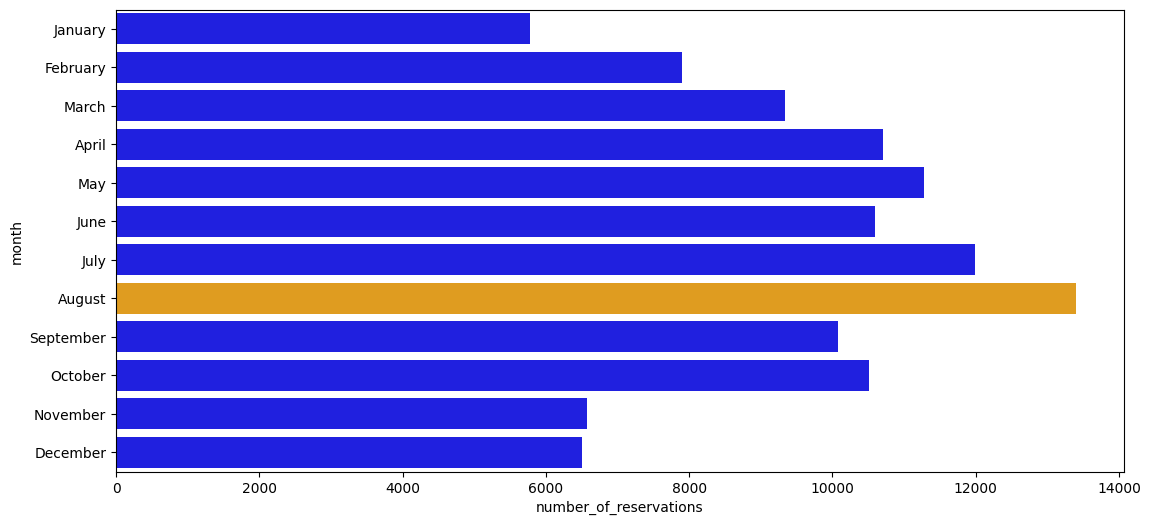

In [29]:
df_month = df['arrival_date_month'].value_counts().reset_index()
df_month.sort_values(by = 'arrival_date_month',inplace=True)
df_month.columns = ['month' , 'number_of_reservations']
palette = ['blue' if month != 'August' else 'orange' for month in df_month['month']]
plt.figure(figsize=(13, 6))
sns.barplot(x='number_of_reservations', y='month', data=df_month , orient = 'h' , hue = 'month' , palette = palette)
#plt.savefig('number_of_reservations_per_month.png', dpi=300, bbox_inches='tight')

The month of August is the busiest month as guests come to enjoy their summer vacation.

In [30]:
df_JW = df[df['hotel'] == 'JW Marriott Hotel']
df_Ren = df[df['hotel'] == 'Renaissance Hotel']
df_adr_JW = df_JW.groupby(df['arrival_date_month'])["revenue"].mean().reset_index()
df_adr_Ren = df_Ren.groupby(df['arrival_date_month'])["revenue"].mean().reset_index()
df_adr_JW.sort_values(by='arrival_date_month', inplace=True)
df_adr_Ren.sort_values(by='arrival_date_month', inplace=True)
df_adr_JW['revenue'] = round(df_adr_JW['revenue'], 2)
df_adr_Ren['revenue'] = round(df_adr_Ren['revenue'], 2)

<ipython-input-30-551c9bed085d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_adr_JW = df_JW.groupby(df['arrival_date_month'])["revenue"].mean().reset_index()
<ipython-input-30-551c9bed085d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_adr_Ren = df_Ren.groupby(df['arrival_date_month'])["revenue"].mean().reset_index()


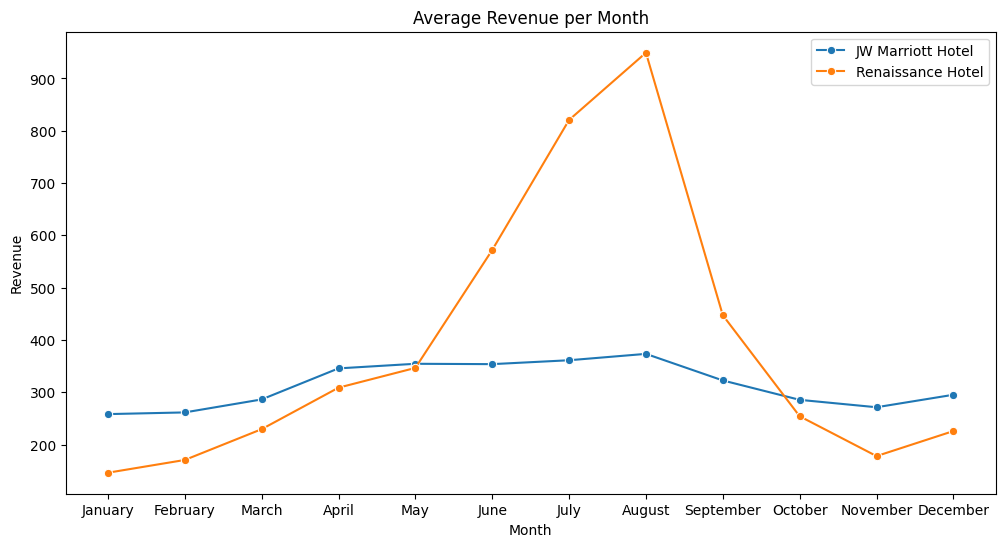

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="arrival_date_month", y="revenue", data=df_adr_JW , marker='o',label='JW Marriott Hotel')
sns.lineplot(x="arrival_date_month", y="revenue", data=df_adr_Ren , marker='o',label='Renaissance Hotel')
plt.title('Average Revenue per Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
#plt.savefig('Average_Revenue_per_Month.png', dpi=300)
plt.show()

Revenue gradually increases for both hotels as we approach the summer season (from June to August) but during the summer season itself Renaissance Hotel achieves a much higher revenue then JW Marriot.

analyzing the correlation matrix

<Axes: >

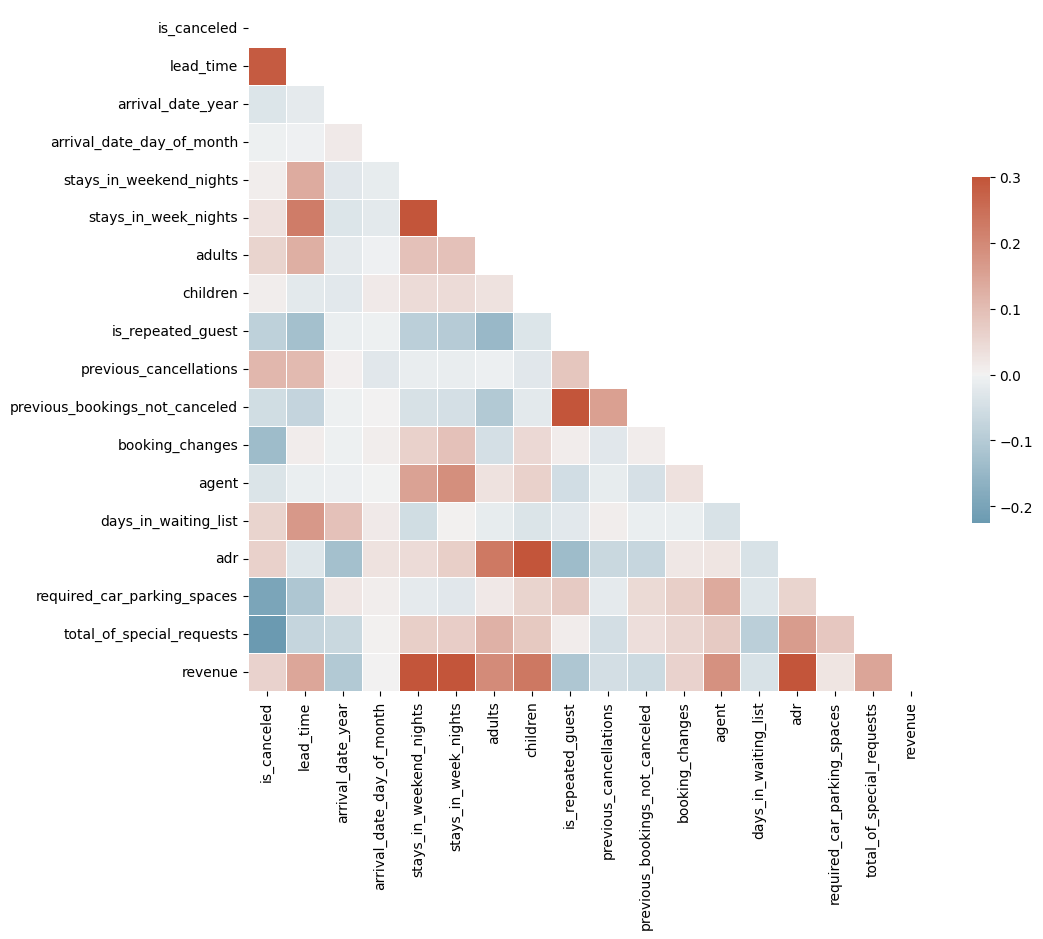

In [32]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig('correlation-matrix-827c71.png', dpi=300, bbox_inches='tight')

It seems evident that 'children' and 'adults' are highly correlated with 'adr'. More intrestingly 'lead_time' is highly correlated with 'is_canceled' which suggests that the amount of lead time before the reservation directly impacts the chance that the guest cancels the reservation. let's explore this relationship further

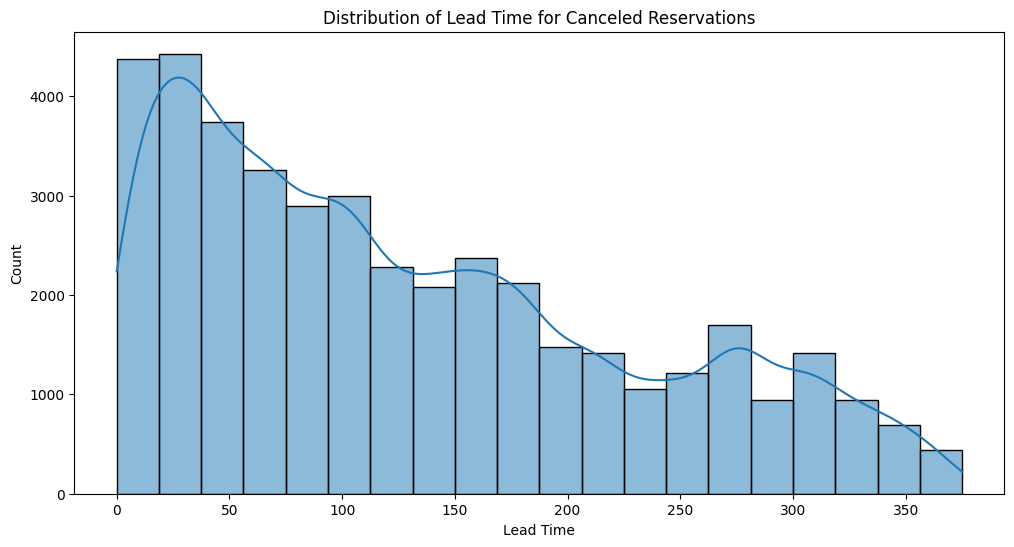

In [33]:
canceled_reservations = df[df['is_canceled'] == 1]
plt.figure(figsize=(12, 6))
sns.histplot(data = canceled_reservations , x='lead_time',bins=20 , kde=True)
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.title('Distribution of Lead Time for Canceled Reservations')
#plt.savefig('Distribution_of_Lead_Time_for_Canceled_Reservations.png', dpi=300)
plt.show()

the plot shows us that people who booked at an earlier date before check-in are less likely to cancel than people who booked 100 days or less before check-in

Now we want to answer the question , are guests who have a history of cancellations likely to cancel again?

<ipython-input-34-858725285200>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['YES', 'NO'], y=[df_previous_cancellations['is_canceled'].mean(), df_no_cancellations['is_canceled'].mean()] , palette=['red','blue'])


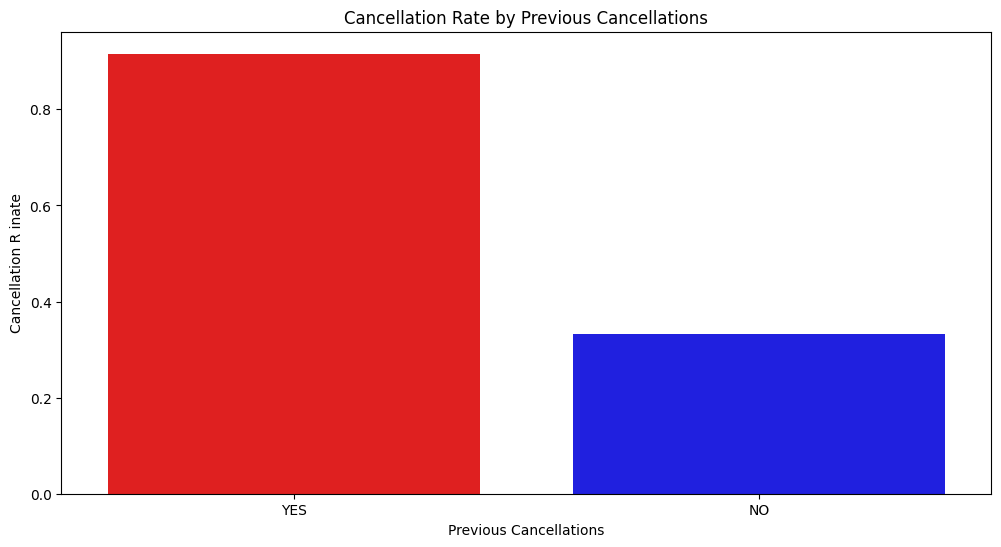

In [34]:
df_previous_cancellations = df[df['previous_cancellations'] > 0]
df_no_cancellations = df[df['previous_cancellations'] == 0]
plt.figure(figsize=(12, 6))
sns.barplot(x=['YES', 'NO'], y=[df_previous_cancellations['is_canceled'].mean(), df_no_cancellations['is_canceled'].mean()] , palette=['red','blue'])
plt.xlabel('Previous Cancellations')
plt.ylabel('Cancellation R inate')
plt.title('Cancellation Rate by Previous Cancellations')
#plt.savefig('Cancellation_Rate_by_Previous_Cancellations.png', dpi=300, bbox_inches='tight')
plt.show()

as expected people who canceled a reseravtion before are much more likely to cancel another reservation

Text(0, 0.5, 'Cancellation Probability')

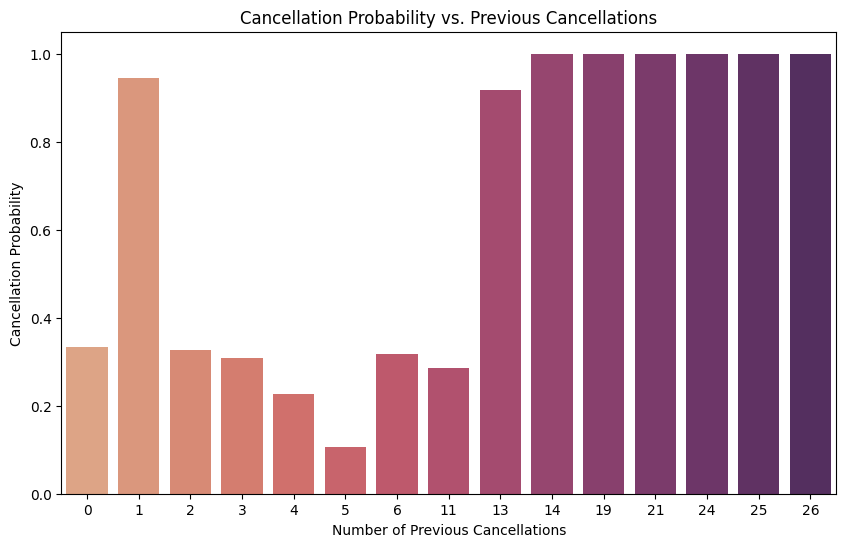

In [35]:
df_grouped = df.groupby('previous_cancellations')['is_canceled'].mean().reset_index()
palette = sns.color_palette('flare', len(df_grouped['previous_cancellations'].unique()))
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='previous_cancellations', y='is_canceled', data=df_grouped , palette=palette , hue='previous_cancellations')
plot.legend_.remove()
plt.title('Cancellation Probability vs. Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Cancellation Probability')
#plt.savefig('Cancellation_Rate_by_Previous_Cancellations.png', dpi=300, bbox_inches='tight')

It appears that people who have cancelled 14 or more times before re almost certin to cancel their reservation again

<ipython-input-36-8fca30a46712>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['YES', 'NO'], y=[df_repeated['is_canceled'].mean(), df_first['is_canceled'].mean()] , palette=['blue','red'])


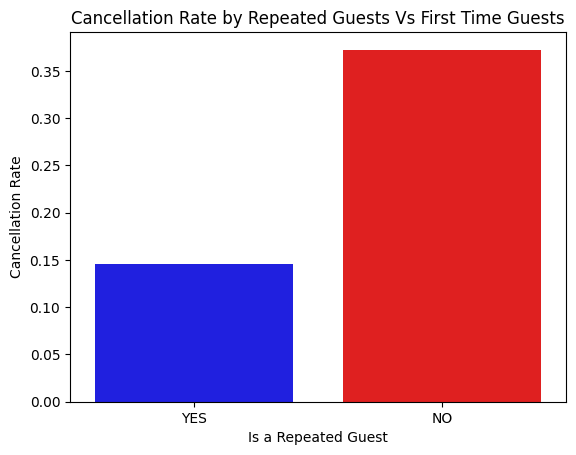

In [36]:
df_repeated  = df[df['is_repeated_guest'] > 0]
df_first = df[df['is_repeated_guest'] == 0]
sns.barplot(x=['YES', 'NO'], y=[df_repeated['is_canceled'].mean(), df_first['is_canceled'].mean()] , palette=['blue','red'])
plt.xlabel('Is a Repeated Guest')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Repeated Guests Vs First Time Guests')
#plt.savefig('Cancellation_Rate_by_Repeated_Guests_Vs_First_Time_Guests.png', dpi=300, bbox_inches='tight')
plt.show()

it also seems like First time guests are more likely to cancel a reservation than repeated guests.

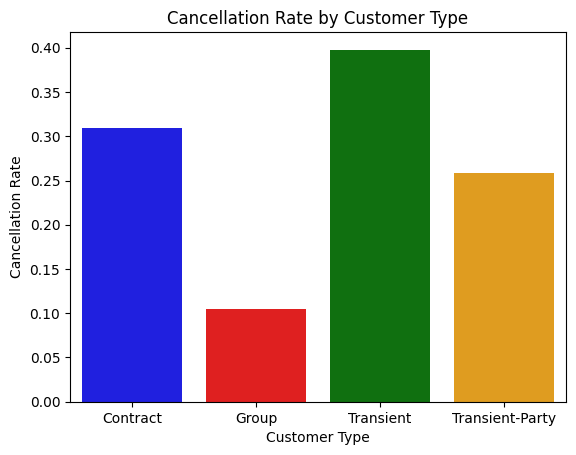

In [37]:
df_cust = df.groupby('customer_type')['is_canceled'].mean().reset_index()
sns.barplot(x='customer_type', y='is_canceled', data=df_cust , palette=['blue','red','green','orange'] , hue = 'customer_type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Customer Type')
#plt.savefig('Cancellation_Rate_by_Customer_Type.png', dpi=300, bbox_inches='tight')
plt.show()


,We can see that Transient guests are the most likely to cancel a reservation

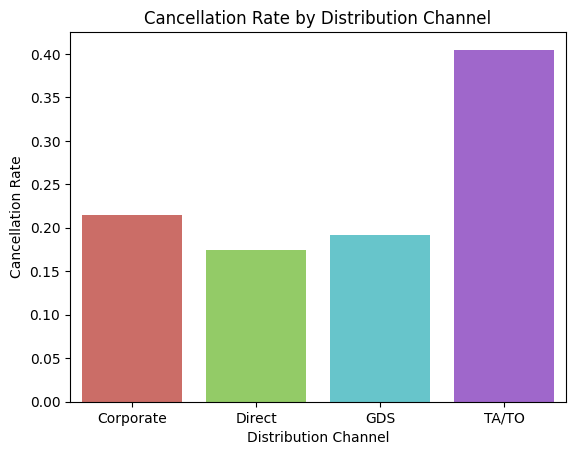

In [38]:
df_dist = df.groupby('distribution_channel')['is_canceled'].mean().reset_index()
df_dist = df_dist[df_dist['distribution_channel']!= 'Undefined']
sns.barplot(x='distribution_channel', y='is_canceled', data=df_dist , palette='hls' , hue = 'distribution_channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Distribution Channel')
#plt.savefig('Cancellation_Rate_by_Distribution_Channel.png', dpi=300, bbox_inches='tight')
plt.show()

Reservations made through  Travel Agents/Tour Operators are the most likely to be cancelled while reservations made directly with the hotel are the least likely to do so.

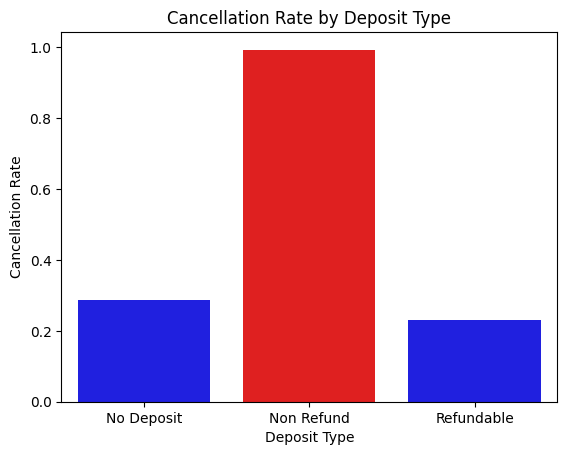

In [39]:
df_dep = df.groupby('deposit_type')['is_canceled'].mean().reset_index()
sns.barplot(x='deposit_type', y='is_canceled', data=df_dep , palette=['blue' , 'red','blue'] , hue = 'deposit_type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Deposit Type')
#plt.savefig('Cancellation_Rate_by_Deposit_Type.png', dpi=300, bbox_inches='tight')
plt.show()

There is a very strange pattern here were guests with deposit type "Non Refund" are the most likely to cancel !.

lets see the meal each distribution channel books the most

In [40]:
df_meal = df.groupby(['customer_type', 'meal']).size().reset_index()
df_meal = df_meal[(df_meal['meal']!='Undefined')]
max_values = df_meal.loc[df_meal.groupby('customer_type')['meal'].idxmax()]
max_values.columns = ['customer_type','meal','frequency']
max_values

,customer_type,meal,frequency
3,Contract,SC,183
8,Group,SC,38
13,Transient,SC,9940
18,Transient-Party,SC,451


Seems like there is a consensus on choosing self catring as it is the most popular choice for all customer types.

#Predictive Model Building

Dropping Unneeded columns

In [41]:
cl = ['arrival_date_year','arrival_date_day_of_month', 'children', 'meal', 'agent', 'days_in_waiting_list', 'required_car_parking_spaces','revenue','country']
df_cleaned = df.drop(columns =cl)

In [42]:
df_cleaned.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'total_of_special_requests'],
      dtype='object')

In [43]:
y = df_cleaned['is_canceled']
X = df_cleaned.drop(columns = 'is_canceled')

Transforming categorial features

In [44]:
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object' or column == 'arrival_date_month':
        X[column] = le.fit_transform(X[column])

In [45]:
X.shape

(114667, 17)

In [46]:
X

,hotel,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,total_of_special_requests
0,1,342,5,0,0,2,1,0,0,0,2,2,3,0,2,0.00,0
2,1,7,5,0,1,1,1,0,0,0,0,2,0,0,2,75.00,0
3,1,13,5,0,1,1,0,0,0,0,0,0,0,0,2,75.00,0
4,1,14,5,0,2,2,3,0,0,0,0,0,0,0,2,98.00,1
5,1,14,5,0,2,2,3,0,0,0,0,0,0,0,2,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,0,164,1,2,4,2,3,0,0,0,0,0,0,0,2,87.60,0
119386,0,102,1,2,5,3,3,0,0,0,4,4,0,0,2,225.43,2
119387,0,34,1,2,5,2,3,0,0,0,3,3,0,0,2,157.71,4
119388,0,109,1,2,5,2,3,0,0,0,0,0,0,0,2,104.40,0


Splitting the dataset

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

Scaling

In [48]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression

In [49]:
LR = LogisticRegression()
LR.fit(X_train , y_train)
y_pred = LR.predict(X_test)
accuracies = cross_val_score(estimator=LR, X=X_train, y=y_train, cv=5)
print(" accuracy : {: .2f} %".format(accuracies.mean() * 100))
print(" standard deviation : {: .2f} %".format(accuracies.std() * 100))

 accuracy :  77.61 %
 standard deviation :  0.21 %


Decision Tree

In [50]:
DT = DecisionTreeClassifier(criterion="entropy")
DT.fit(X_train , y_train)
y_pred = DT.predict(X_test)
accuracies = cross_val_score(estimator=DT, X=X_train, y=y_train, cv=5)
print(" accuracy : {: .2f} %".format(accuracies.mean() * 100))
print(" standard deviation : {: .2f} %".format(accuracies.std() * 100))

 accuracy :  79.98 %
 standard deviation :  0.20 %


Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
accuracies = cross_val_score(estimator=RF, X=X_train, y=y_train, cv=5)
print(" accuracy : {: .2f} %".format(accuracies.mean() * 100))
print(" standard deviation : {: .2f} %".format(accuracies.std() * 100))

KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracies = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=5)
print(" accuracy : {: .2f} %".format(accuracies.mean() * 100))
print(" standard deviation : {: .2f} %".format(accuracies.std() * 100))

Naive Bayes

In [ ]:
NB = GaussianNB()
NB.fit(X_train , y_train)
y_pred = NB.predict(X_test)
accuracies = cross_val_score(estimator=NB, X=X_train, y=y_train, cv=5)
print(" accuracy : {: .2f} %".format(accuracies.mean() * 100))
print(" standard deviation : {: .2f} %".format(accuracies.std() * 100))

XGBoost

In [ ]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Neural Network

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)
#model.save('model.h5')

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(accuracy*100))

# Calculate standard deviation
std_dev = np.std(y_pred == y_test)
print("Standard Deviation: {:.2f} %".format(std_dev*100))

The Random Forest Classifier  is the best model as it achieves a 5-fold Cross Validation Accuracy of about 84.70 % with a Standard Deviation of only 0.21 %

#Making Animations


In [ ]:
# # Mean values for the animation
# rng = df_month['number_of_reservations']
# # Labels for bars
# quarter = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# # Initialize starting data for both bars
# initial_data = [0,0,0,0 ,0,0,0,0,0,0,0,0]
# # Create figure and axis
# fig, ax = plt.subplots(figsize=(12, 6))
# ax.invert_yaxis()
# plt.xlabel('number of reservations')
# plt.ylabel('month')
# plt.title('Number of reservations per month')

# # List of artists for animation
# artists = []

# # Bar colors
# colors = ['tab:blue']*12
# colors[7] = 'gold'

# # Create the bar container for the animation
# for i in range(100):
#     # Interpolate data for smooth transition over 100 frames
#     data = initial_data + (rng - initial_data) * (i / 100)
#     # Create bar chart for the current frame
#     container = ax.barh(quarter, data, color=colors, height=0.8)
#     # Append the container (bars) to the artists list for the animation
#     artists.append(container)
# for _ in range(500):
#     artists.append(container)

# # Create and display the animation
# ani = animation.ArtistAnimation(fig, artists, interval=18, repeat=False)
# plt.show()

# # Optionally save animation as a video
# ani.save("Number_of_reservations_per_month.mp4")

In [ ]:
# # Mean values for the animation
# rng0 = df_previous_cancellations['is_canceled'].mean()
# rng1 = df_no_cancellations['is_canceled'].mean()

# # Labels for bars
# quarter = ['YES', 'NO']

# # Initialize starting data for both bars
# initial_data = [0, 0]

# # Create figure and axis
# fig, ax = plt.subplots(figsize=(12, 6))
# plt.xlabel('Previous Cancellations')
# plt.ylabel('Cancellation Rate')
# plt.title('Cancellation Rate by Previous Cancellations')

# # List of artists for animation
# artists = []

# # Bar colors
# colors = ['tab:red', 'tab:blue']

# # Create the bar container for the animation
# for i in range(100):
#     # Interpolate data for smooth transition over 100 frames
#     data = [initial_data[0] + (rng0 - initial_data[0]) * (i / 100),
#             initial_data[1] + (rng1 - initial_data[1]) * (i / 100)]

#     # Create bar chart for the current frame
#     container = ax.bar(quarter, data, color=colors, width=0.6)

#     # Append the container (bars) to the artists list for the animation
#     artists.append(container)
# for _ in range(500):
#     artists.append(container)

# # Create and display the animation
# ani = animation.ArtistAnimation(fig, artists, interval=18, repeat=False)
# plt.show()

# # Optionally save animation as a video
# ani.save("Cancellation_Rate_by_Previous_Cancellations.mp4")


In [ ]:
# # Mean values for the animation
# rng0 = df_repeated['is_canceled'].mean()
# rng1 = df_first['is_canceled'].mean()

# # Labels for bars
# quarter = ['YES', 'NO']

# # Initialize starting data for both bars
# initial_data = [0, 0]

# # Create figure and axis
# fig, ax = plt.subplots(figsize=(12, 6))
# plt.xlabel('Is a Repeated Guest')
# plt.ylabel('Cancellation Rate')
# plt.title('Cancellation Rate by Repeated Guests Vs First Time Guests')

# # List of artists for animation
# artists = []

# # Bar colors
# colors = ['tab:blue', 'tab:red']

# # Create the bar container for the animation
# for i in range(100):
#     # Interpolate data for smooth transition over 100 frames
#     data = [initial_data[0] + (rng0 - initial_data[0]) * (i / 100),
#             initial_data[1] + (rng1 - initial_data[1]) * (i / 100)]

#     # Create bar chart for the current frame
#     container = ax.bar(quarter, data, color=colors, width=0.6)

#     # Append the container (bars) to the artists list for the animation
#     artists.append(container)
# for _ in range(500):
#     artists.append(container)

# # Create and display the animation
# ani = animation.ArtistAnimation(fig, artists, interval=18, repeat=False)
# plt.show()

# # Optionally save animation as a video
# ani.save("Cancellation_Rate_by_Repeated_Guests_Vs_First_Time_Guests.mp4")

In [ ]:
# quarter = ['Contract' , 'Group' , 'Transient' , 'Transient-Party']
# rng = df_cust['is_canceled']
# initial_data = np.array([0,0,0,0])
# fig,ax = plt.subplots(figsize=(12,6))
# plt.xlabel('Customer Type')
# plt.ylabel('Cancellation Rate')
# plt.title('Cancellation Rate by Customer Type')
# artists = []
# colors = ['tab:blue','tab:red','tab:green','tab:orange']
# for i in range(100):
#   data = initial_data + (rng - initial_data) * (i / 100)
#   #data = np.minimum(initial_data + rng, rng)
#   container = ax.bar(quarter,data,color = colors,width=0.6)
#   artists.append(container)
# for _ in range(500):
#     artists.append(container)
# ani = animation.ArtistAnimation(fig,artists,interval=18 , repeat=False)
# plt.show()
# ani.save("Cancellation Rate by Customer Type.mp4")

In [ ]:
# quarter = ['Corprate' , 'Direct' , 'GDS' , 'TA/TO']
# rng = df_dist['is_canceled']
# initial_data = np.array([0,0,0,0])
# fig,ax = plt.subplots(figsize=(12,6))
# plt.xlabel('Distribution Channel')
# plt.ylabel('Cancellation Rate')
# plt.title('Cancellation Rate by Distribution Channel')
# artists = []
# colors = ['tab:blue','tab:red','tab:green','tab:orange']
# for i in range(100):
#   data = initial_data + (rng - initial_data) * (i / 100)
#   #data = np.minimum(initial_data + rng, rng)
#   container = ax.bar(quarter,data,color = colors ,width=0.6)
#   artists.append(container)
# for _ in range(500):
#     artists.append(container)
# ani = animation.ArtistAnimation(fig,artists,interval=18 , repeat=False)
# plt.show()
# ani.save("Cancellation_Rate_by_Distribution_Channel.mp4")

In [ ]:
# quarter = ['No Deposit' , 'Non Refund Deposit Type' , 'Refundble']
# rng = df_dep['is_canceled']
# initial_data = np.array([0,0,0])
# fig,ax = plt.subplots(figsize=(12,6))
# plt.xlabel('Deposit Type')
# plt.ylabel('Cancellation Rate')
# plt.title('Cancellation Rate by Deposit Type')
# artists = []
# colors = ['tab:blue','tab:red','tab:blue']
# for i in range(100):
#   data = initial_data + (rng - initial_data) * (i / 100)
#   container = ax.bar(quarter,data,color = colors,width=0.6)
#   artists.append(container)
# for _ in range(500):
#     artists.append(container)
# ani = animation.ArtistAnimation(fig,artists,interval=18 , repeat=False)
# plt.show()
# ani.save("Cancellation_Rate_by_Deposit_Type.mp4")